In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

from tensorflow.keras.models import load_model
import ast
from tensorflow.keras.preprocessing import image

from tensorflow.keras.utils import Sequence
from tensorflow.keras.applications.densenet import DenseNet121
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.applications.efficientnet import EfficientNetB4
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, GlobalAveragePooling2D
from tensorflow.keras.layers import Conv2D, ZeroPadding2D, MaxPool2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import numpy as np
import matplotlib.pyplot as plt
import cv2
from skimage import io

In [2]:
os.chdir("../dataset")

In [3]:
parent = "2_0_ready"

train_path = f"{parent}/train"
validation_path = f"{parent}/validation"
test_path = f"{parent}/test"

In [4]:
batch_size = 32
img_height = 256
img_width = 256

In [5]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen= ImageDataGenerator(
                rescale=1./255,
                # zoom_range=0.15, 
                # width_shift_range=0.2,
                # shear_range=0.15
                )
test_datagen = ImageDataGenerator(rescale=1./255)

In [6]:
#setting train test split
train = train_datagen.flow_from_directory(
        train_path,
        target_size=(img_height,img_width),
        class_mode='categorical',
        batch_size=batch_size,
        subset='training' )

test = test_datagen.flow_from_directory(
        test_path,
        target_size=(img_height,img_width),
        class_mode='categorical',
        batch_size=batch_size,
        shuffle=False )

validation = test_datagen.flow_from_directory(
        validation_path,
        target_size=(img_height,img_width),
        class_mode='categorical',
        batch_size=batch_size,
        shuffle=False )

Found 7575 images belonging to 2 classes.
Found 900 images belonging to 2 classes.
Found 950 images belonging to 2 classes.


In [7]:
classes = train.num_classes
classes

2

In [8]:
labels=train.class_indices
final_labels={v: k for k, v in labels.items()}

In [9]:
# conv_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))
# conv_model = EfficientNetB4(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3)) 
conv_model = ResNet50(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))
# conv_model = MobileNet(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3)) 
# conv_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3)) 

In [10]:
def main_model(tl_model,classess):
    m_model=tl_model.output
    m_model=Flatten()(m_model)
    m_model=Dense(1024,activation='relu')(m_model)
    m_model=Dropout(.2)(m_model)
    m_model=Dense(1024,activation='relu')(m_model)
    m_model=Dropout(.2)(m_model)
    m_model=Dense(512,activation='relu')(m_model)
    m_model=Dropout(.2)(m_model)
    m_model=Dense(classess,activation='softmax')(m_model)
    return m_model

In [11]:
combining_model=main_model(conv_model, classes)
model=Model(inputs=conv_model.input, outputs=combining_model)

In [12]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 262, 262, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 128, 128, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 64, 64, 64)  0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 64, 64, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 64, 64, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 64, 64, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv3_block3_1_relu (Activatio  (None, 32, 32, 128)  0          ['conv3_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 32, 32, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 32, 32, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 32, 32, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv4_block2_1_bn (BatchNormal  (None, 16, 16, 256)  1024       ['conv4_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_1_relu (Activatio  (None, 16, 16, 256)  0          ['conv4_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 16, 16, 256)  590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 16, 16, 256)  1024       ['conv4_block2_2_conv[0][0]']    
 ization) 

 conv4_block5_1_conv (Conv2D)   (None, 16, 16, 256)  262400      ['conv4_block4_out[0][0]']       
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, 16, 16, 256)  1024       ['conv4_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_1_relu (Activatio  (None, 16, 16, 256)  0          ['conv4_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_2_conv (Conv2D)   (None, 16, 16, 256)  590080      ['conv4_block5_1_relu[0][0]']    
                                                                                                  
 conv4_blo

                                                                  'conv5_block1_3_bn[0][0]']      
                                                                                                  
 conv5_block1_out (Activation)  (None, 8, 8, 2048)   0           ['conv5_block1_add[0][0]']       
                                                                                                  
 conv5_block2_1_conv (Conv2D)   (None, 8, 8, 512)    1049088     ['conv5_block1_out[0][0]']       
                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, 8, 8, 512)   2048        ['conv5_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_1_relu (Activatio  (None, 8, 8, 512)   0           ['conv5_block2_1_bn[0][0]']      
 n)       

In [13]:
os.chdir("../program/")
model.load_weights('model_project.h5')  # load best val_accuracy
os.chdir("../dataset/")

In [14]:
def prediksi(imgname, from_test_dir):
    test_image=io.imread(imgname)
    test_image=cv2.cvtColor(test_image, cv2.COLOR_RGBA2RGB)
    dest_area = img_width * img_height
    source_area = test_image.shape[0] * test_image.shape[1]
    test_image = cv2.resize(test_image, (img_width, img_height), interpolation=cv2.INTER_AREA if source_area > dest_area else cv2.INTER_CUBIC)

    plt.imshow(test_image)
    plt.show()

    test_image=np.asarray(test_image)
    test_image=np.expand_dims(test_image, axis=0)
    result=model.predict(test_image)

    result_dict=dict()
    for key in list(final_labels.keys()):
        result_dict[final_labels[key]] = result[0][key]
    
    sorted_result={k: v for k, v in sorted(result_dict.items(),key=lambda item:item[1], reverse=True)}

    if not from_test_dir:
        print('='*50)
        for label in sorted_result.keys():
            print('{}:{}%'.format(label, sorted_result[label]*100))
    
    final_result=dict()
    final_result[list(sorted_result.keys())[0]]=sorted_result[list(sorted_result.keys())[0]]*100

    return final_result


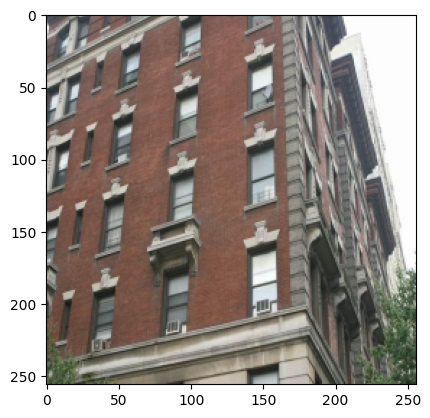

1/1 [==============================] - 4s 4s/step
forged:100.0%
original:0.0%
Original:  {'forged': 100.0}


In [15]:
org = prediksi(os.path.join("MICC-F220", "CRW_4827_scale.jpg"), False)
print('Original: ', org)

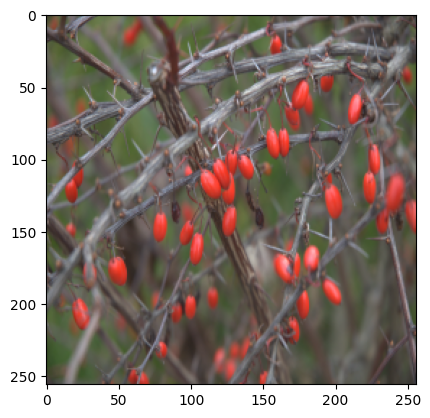

1/1 [==============================] - 0s 35ms/step
forged:100.0%
original:0.0%
Forged:  {'forged': 100.0}


In [16]:
frg = prediksi(os.path.join("MICC-F600", "_r30_s1200berries.png"), False)
print('Forged: ', frg)